<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/3%EC%A3%BC%EC%B0%A8/Custom_vision_%EC%9E%90%EB%8F%99%ED%99%94_7%EC%9B%948%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 패키지 설치

In [ ]:
!pip install --q azure-cognitiveservices-vision-customvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry , ImageFileCreateBatch, Region
from msrest.authentication import ApiKeyCredentials

-***필요한 값들 저장***


1.  custom vision 리소스에 들어가 keys and Endpoints 에서 값을 찾는다.




In [ ]:
ENDPOINT='https://fisher11customcv.cognitiveservices.azure.com/'
training_key='a1ca7100bf8f44179a0e2864dc0f9355'
prediction_key='29607537d90d44fcaeafafc493596461'
ENDPOINT_prediction='https://fisher11customcv-prediction.cognitiveservices.azure.com/'
prediction_resource_id='/subscriptions/bcfab3c8-b055-4276-8d98-217f8763d9ab/resourceGroups/GAMMA_group/providers/Microsoft.CognitiveServices/accounts/Fisher11Customcv-Prediction'

In [ ]:
credentials = ApiKeyCredentials(in_headers={"Training-key":training_key}) # training key를 이용해 credential에 키값을 저장
trainer = CustomVisionTrainingClient(ENDPOINT, credentials) # trainer에 endpoint와 키값을 전달

- 프로젝트 생성

In [ ]:
print('Creating project')
project = trainer.create_project('Labuser-11 Project')
# unplish 해서 이전에 했던 것 삭제

Creating project


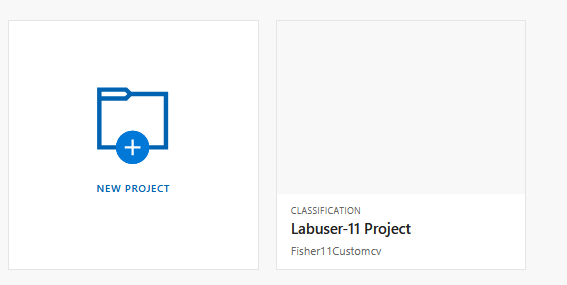

In [ ]:
food1_tag = trainer.create_tag(project.id, 'jajangmyeon')
food2_tag = trainer.create_tag(project.id, 'jjambbong')
food3_tag = trainer.create_tag(project.id, 'tangsuyook')

- 프로젝트에 들어가기
  태그가 생성된 것을 볼 수 있다.
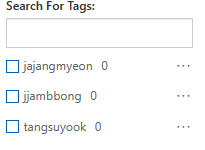

In [ ]:
# 데이터를 업로드하는 코드도 있으나 이번엔 직접 업로드 하겠음<수업에서 이렇게 진행;> 이전에 준비한 이미지 add image하고, 태깅하면 됨.

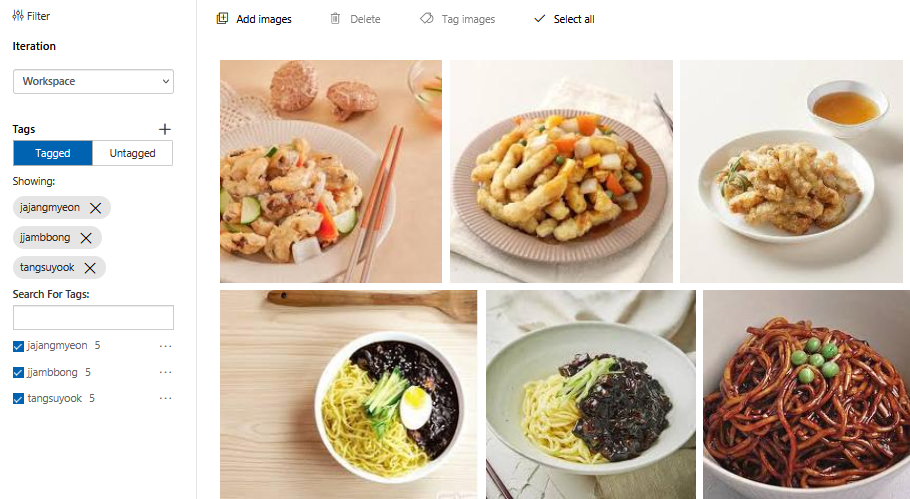

In [ ]:
# training 을 하기 위한 라이브러리 불러오기
# training이 제대로 진행되고 있는지 확인
# training의 status가 completed가 아니면 10초마다 training status를 출력

In [ ]:
import time
iteration = trainer.train_project(project.id)
while (iteration.status != 'Completed'):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print('Training status: {}'.format(iteration.status))
    time.sleep(10)

Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed


prediction_resource_id 확인

*   2번째 코드 창에서 prediction_key=''
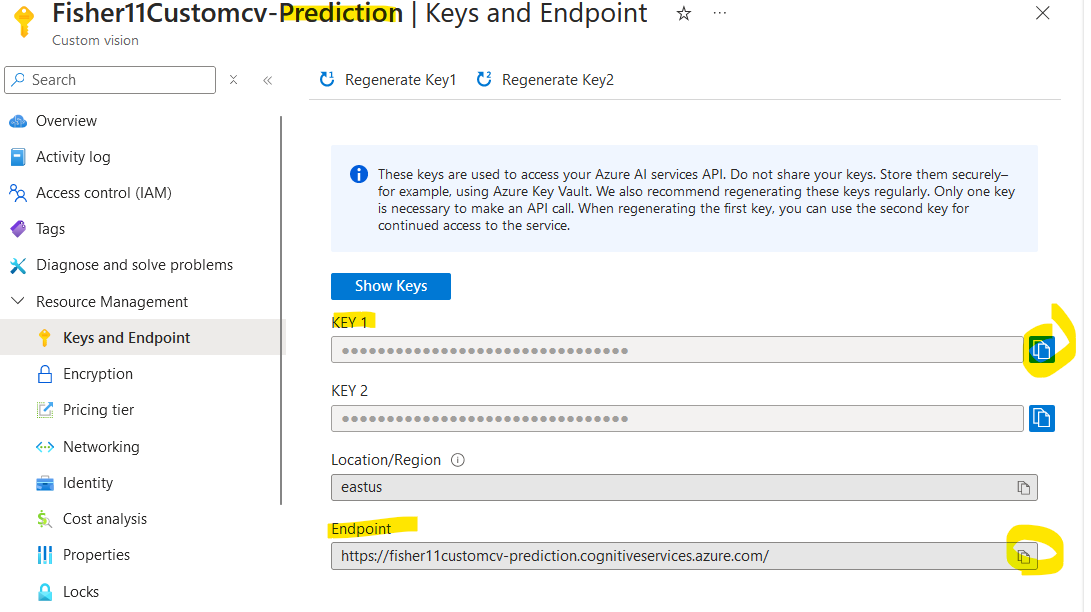
*   항목 추가

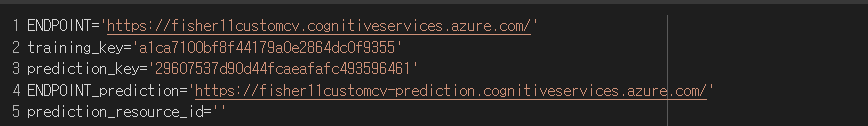
prediction_endpint 추가
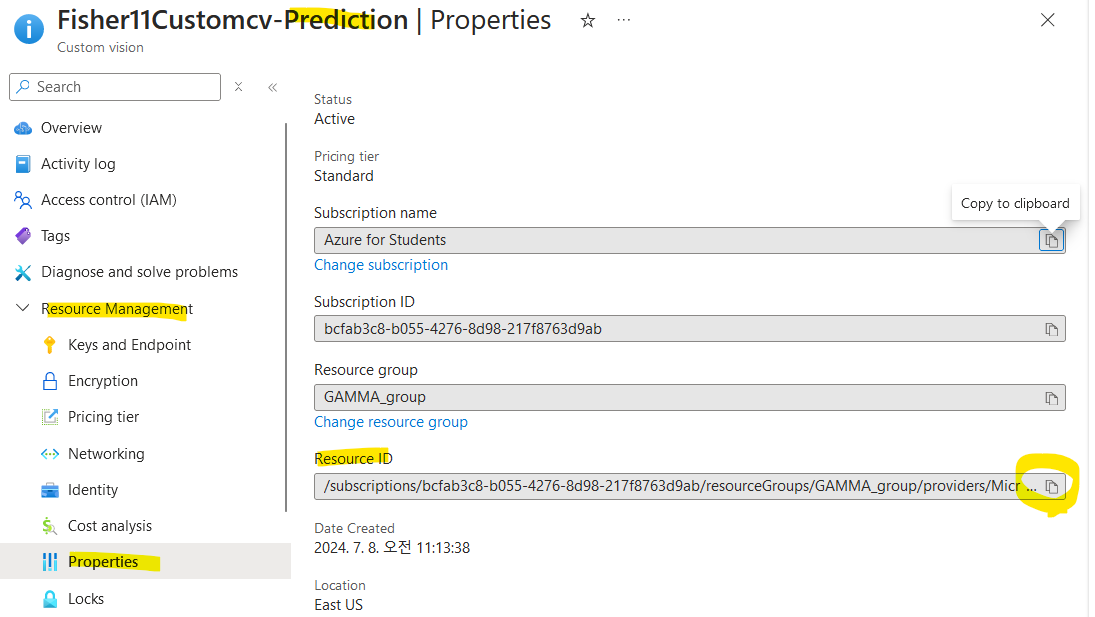

리소스 아이디 추가 후 해당 셀 다시 실행!
정리를 잘 못해서; 강사님 네이버 블로그에도 올려주셨음

In [ ]:
publish_iteration_name = 'classifyModel' #이름
trainer.publish_iteration(project.id, iteration.id, publish_iteration_name, prediction_resource_id) # 배포

print('Done')

Done


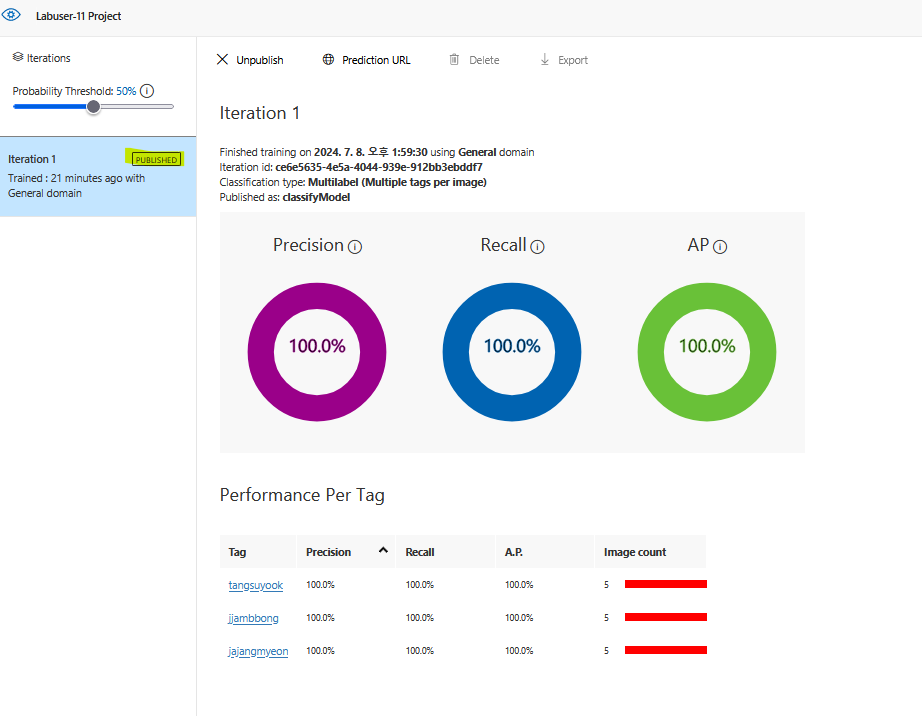

### 추론 시행

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

In [ ]:
# 추론 객체 생성?  그냥 model fit하는 거랑 같은 듯
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key}) # 보안 역할
predictor = CustomVisionPredictionClient(ENDPOINT_prediction, prediction_credentials)

탕수육 이미지 검색한 후 링크 복사하고 target_image_url에 넣기

In [ ]:
target_image_url = 'https://cdn-pro-web-247-144.cdn-nhncommerce.com/koreafood373_godomall_com/data/goods/20/10/43/1000000336/1000000336_detail_323.png'
results = predictor.classify_image_url(project.id, publish_iteration_name, target_image_url)

In [ ]:
for predictionn in results.predictions:
    print('\t' + predictionn.tag_name + ': {0:.2f}%'.format(predictionn.probability * 100))

	tangsuyook: 99.65%
	jajangmyeon: 1.87%
	jjambbong: 0.07%


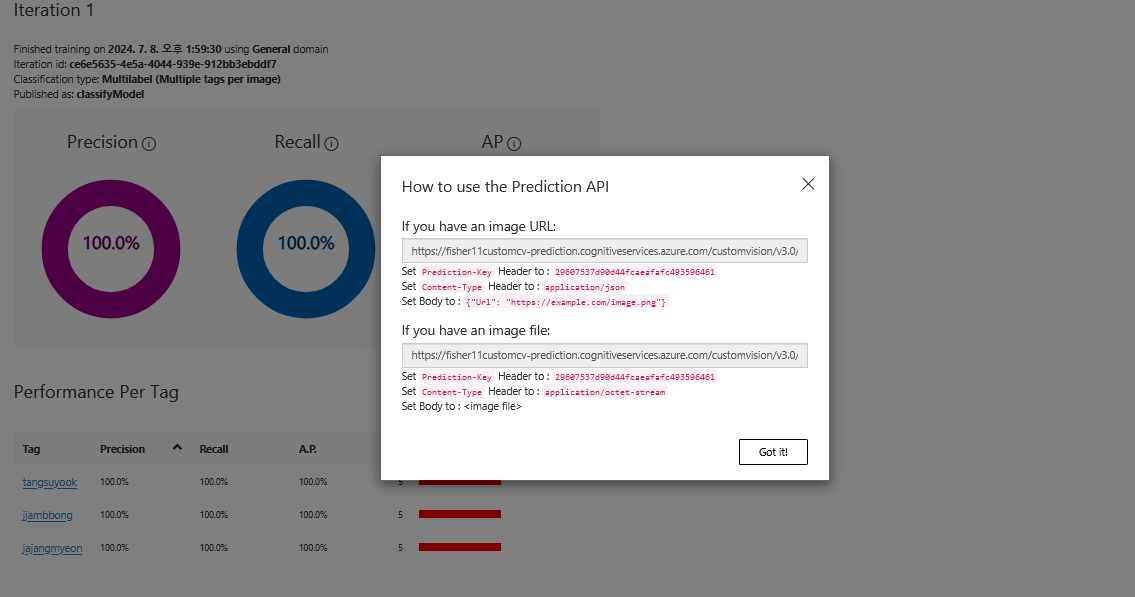

# 동영상 참조..


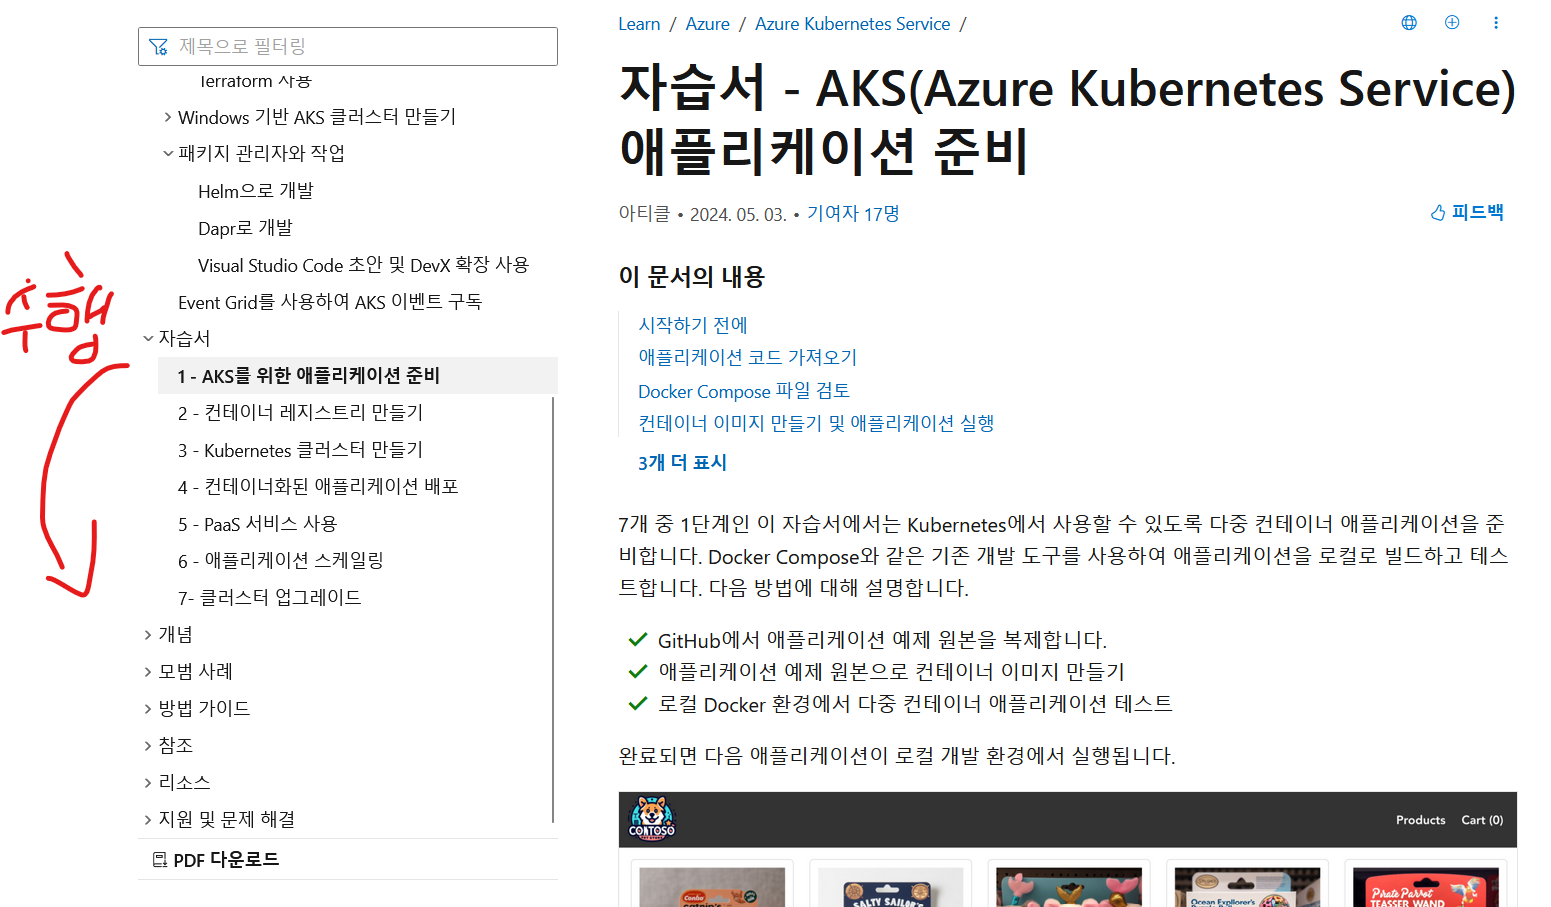

In [ ]:
### 우분투 가상머신 접속

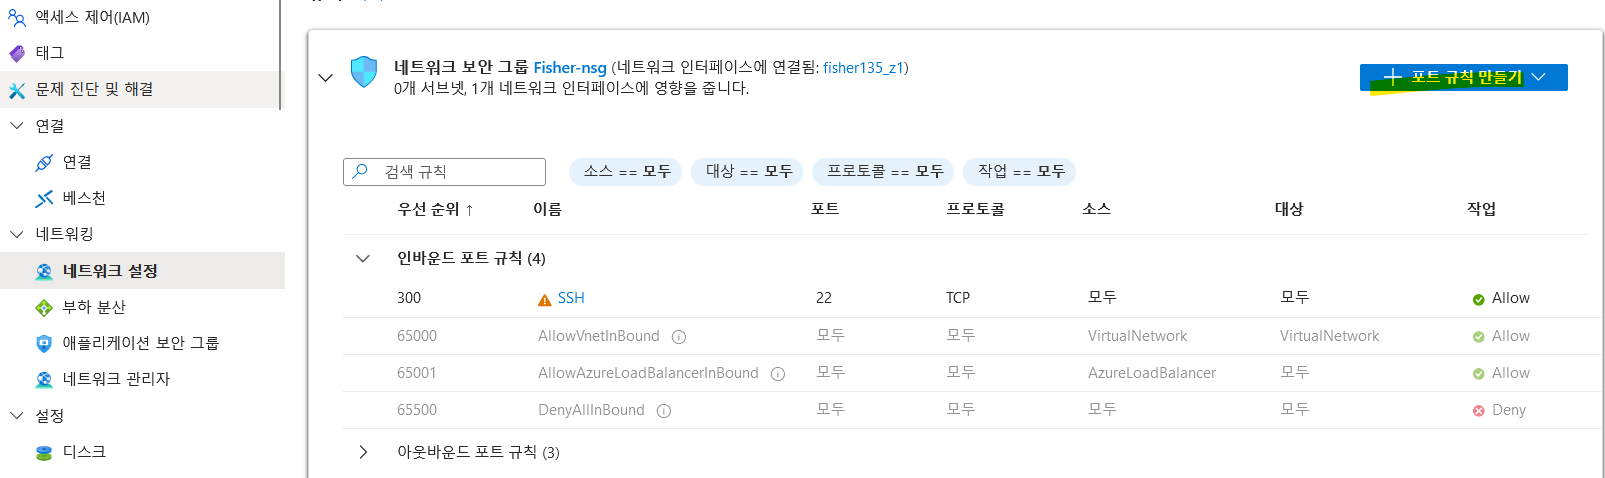

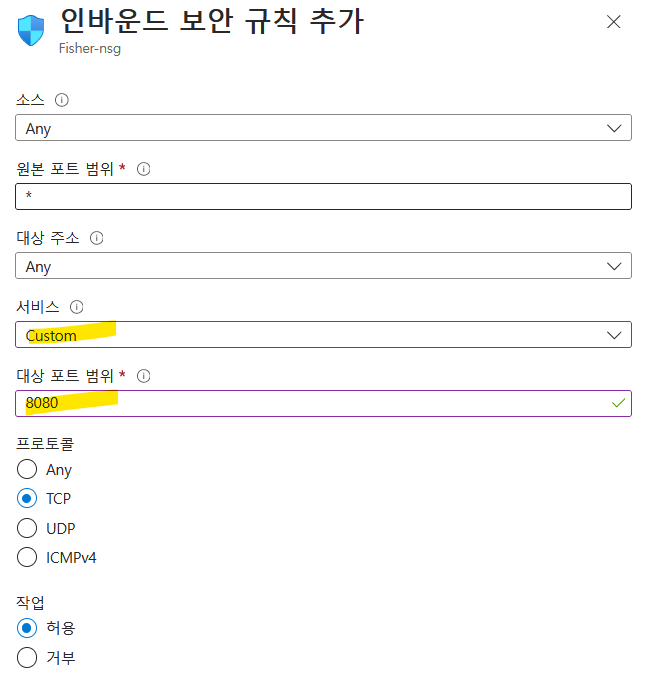

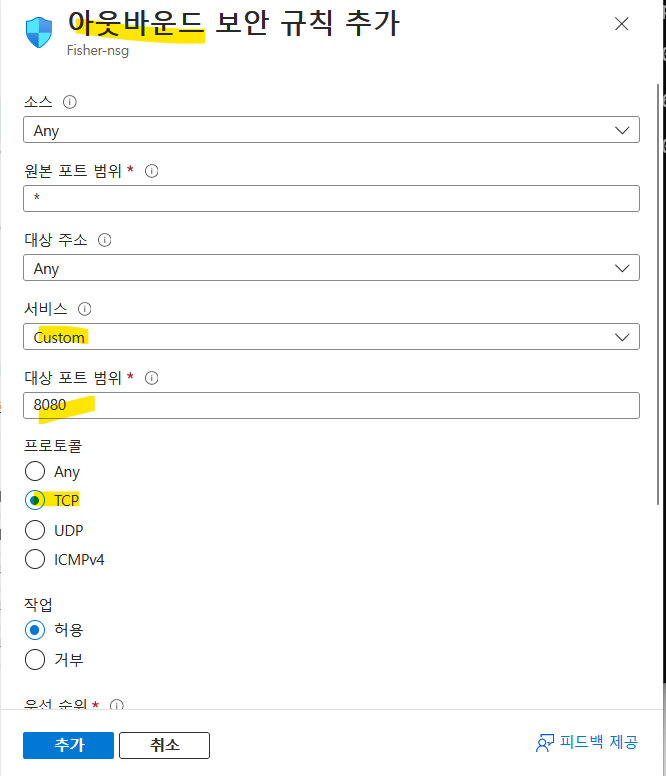

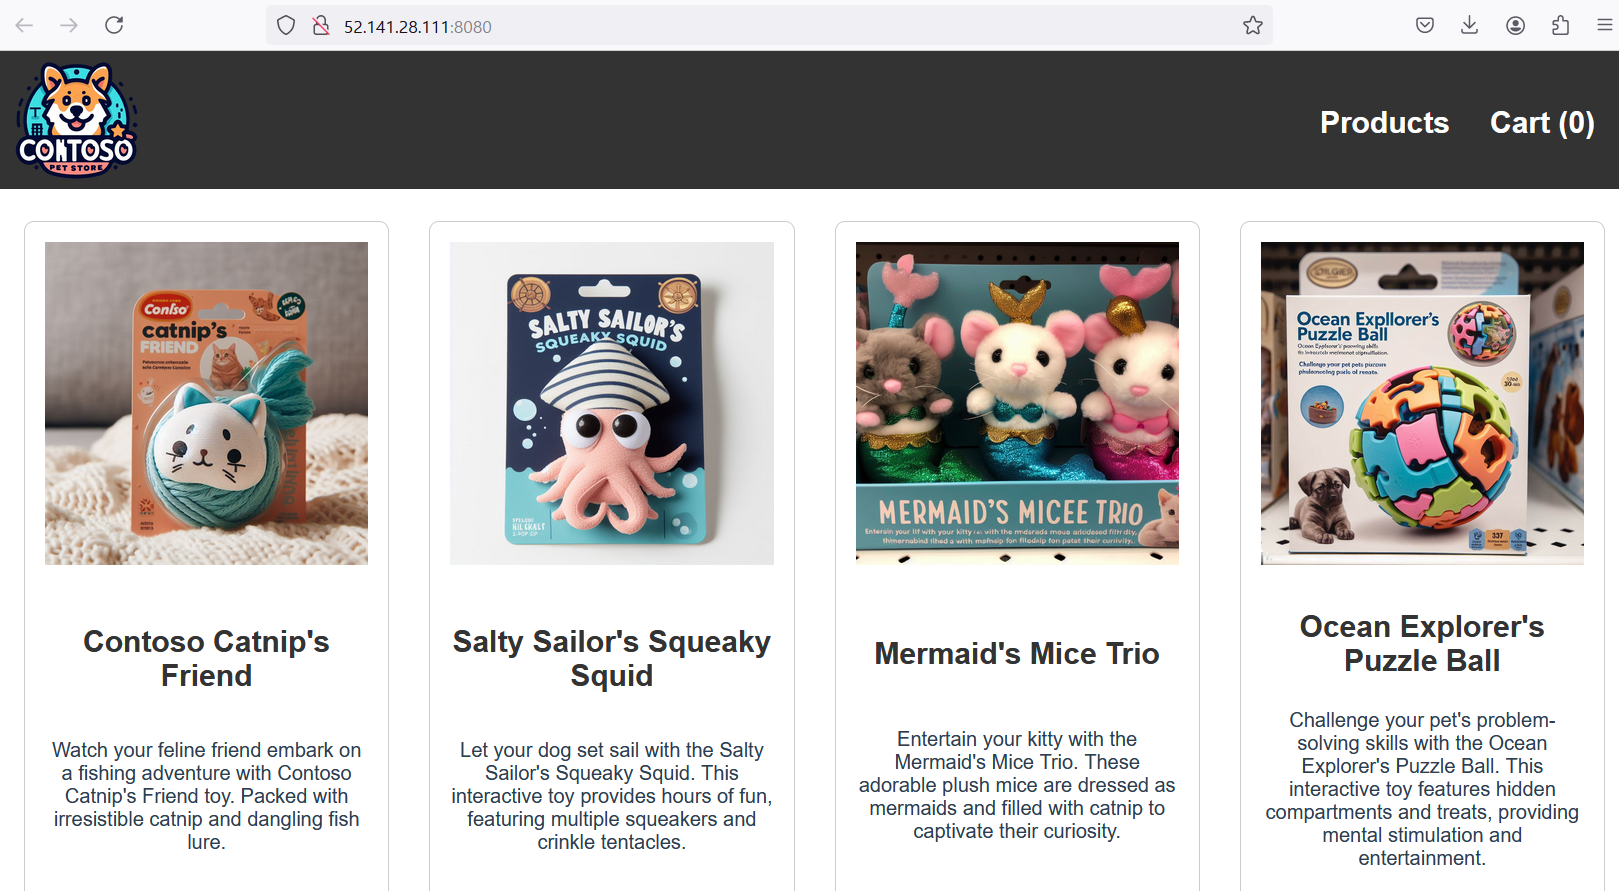

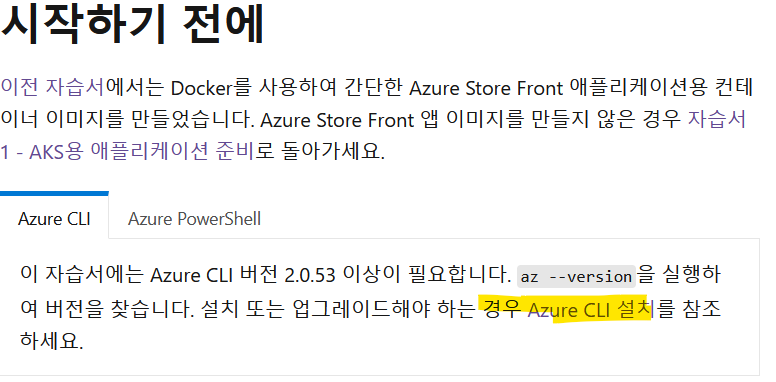

# apt를 사용하여 Ubuntu/Debian에 설치
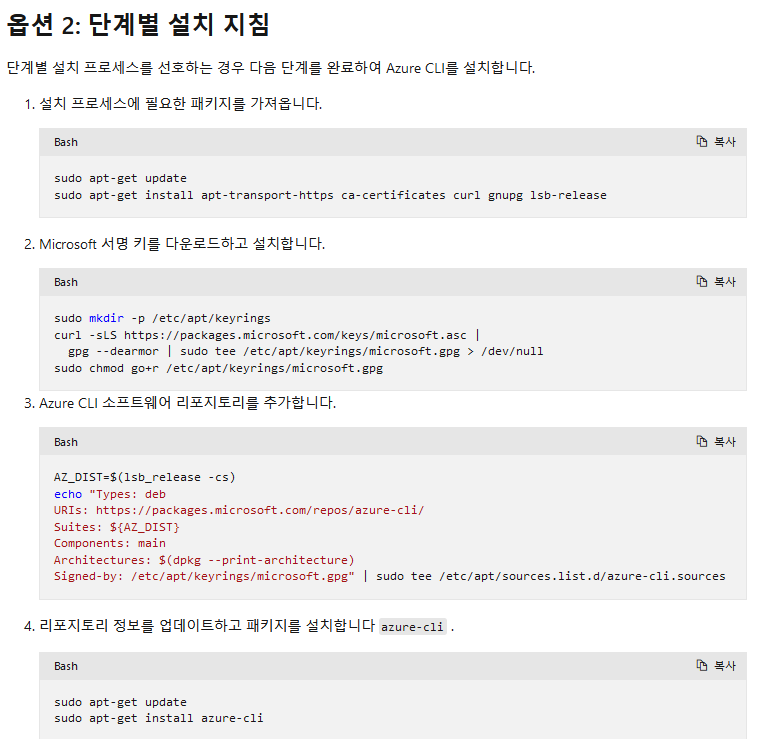

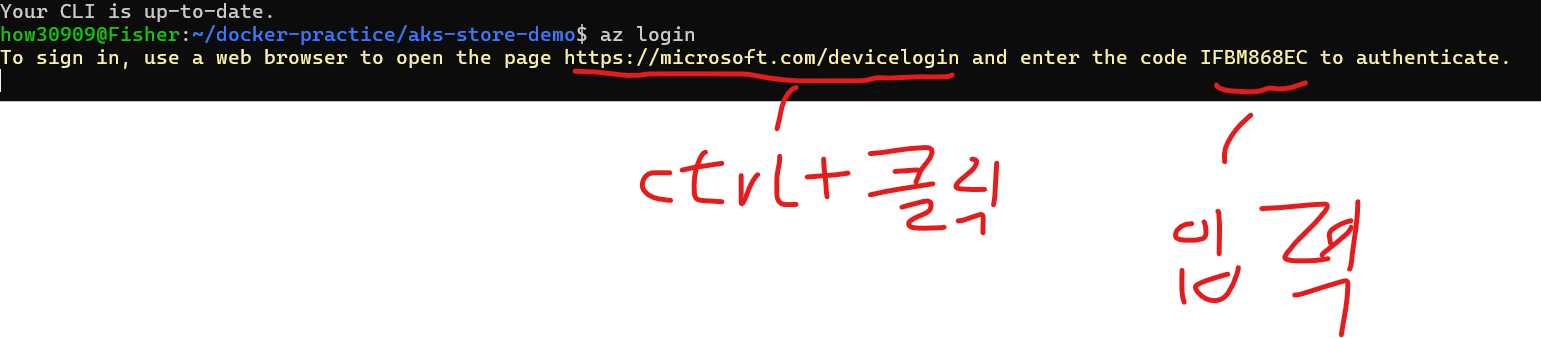